<a href="https://colab.research.google.com/github/pollycarp/Heart-disease-prediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Start by importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, classification_report,
                           confusion_matrix, roc_auc_score, roc_curve,
                           precision_recall_curve, f1_score)
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

1. Data Loading and Initial Exploration

In [ ]:
# Load the dataset
print("Loading Heart Disease Dataset...")
df = pd.read_csv('heart.csv')

# Initial data exploration
print("=" * 50)
print("DATASET OVERVIEW")
print("=" * 50)
print(f"Dataset Shape: {df.shape}")
print(f"Number of patients: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

print("\nFirst 5 rows of the dataset:")
display(df.head())

print("\nDataset Information:")
print(df.info())

print("\nBasic Statistics:")
display(df.describe())

Loading Heart Disease Dataset...
DATASET OVERVIEW
Dataset Shape: (303, 14)
Number of patients: 303
Number of features: 14

First 5 rows of the dataset:


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None

Basic Statistics:


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


2. Comprehensive Data Visualization

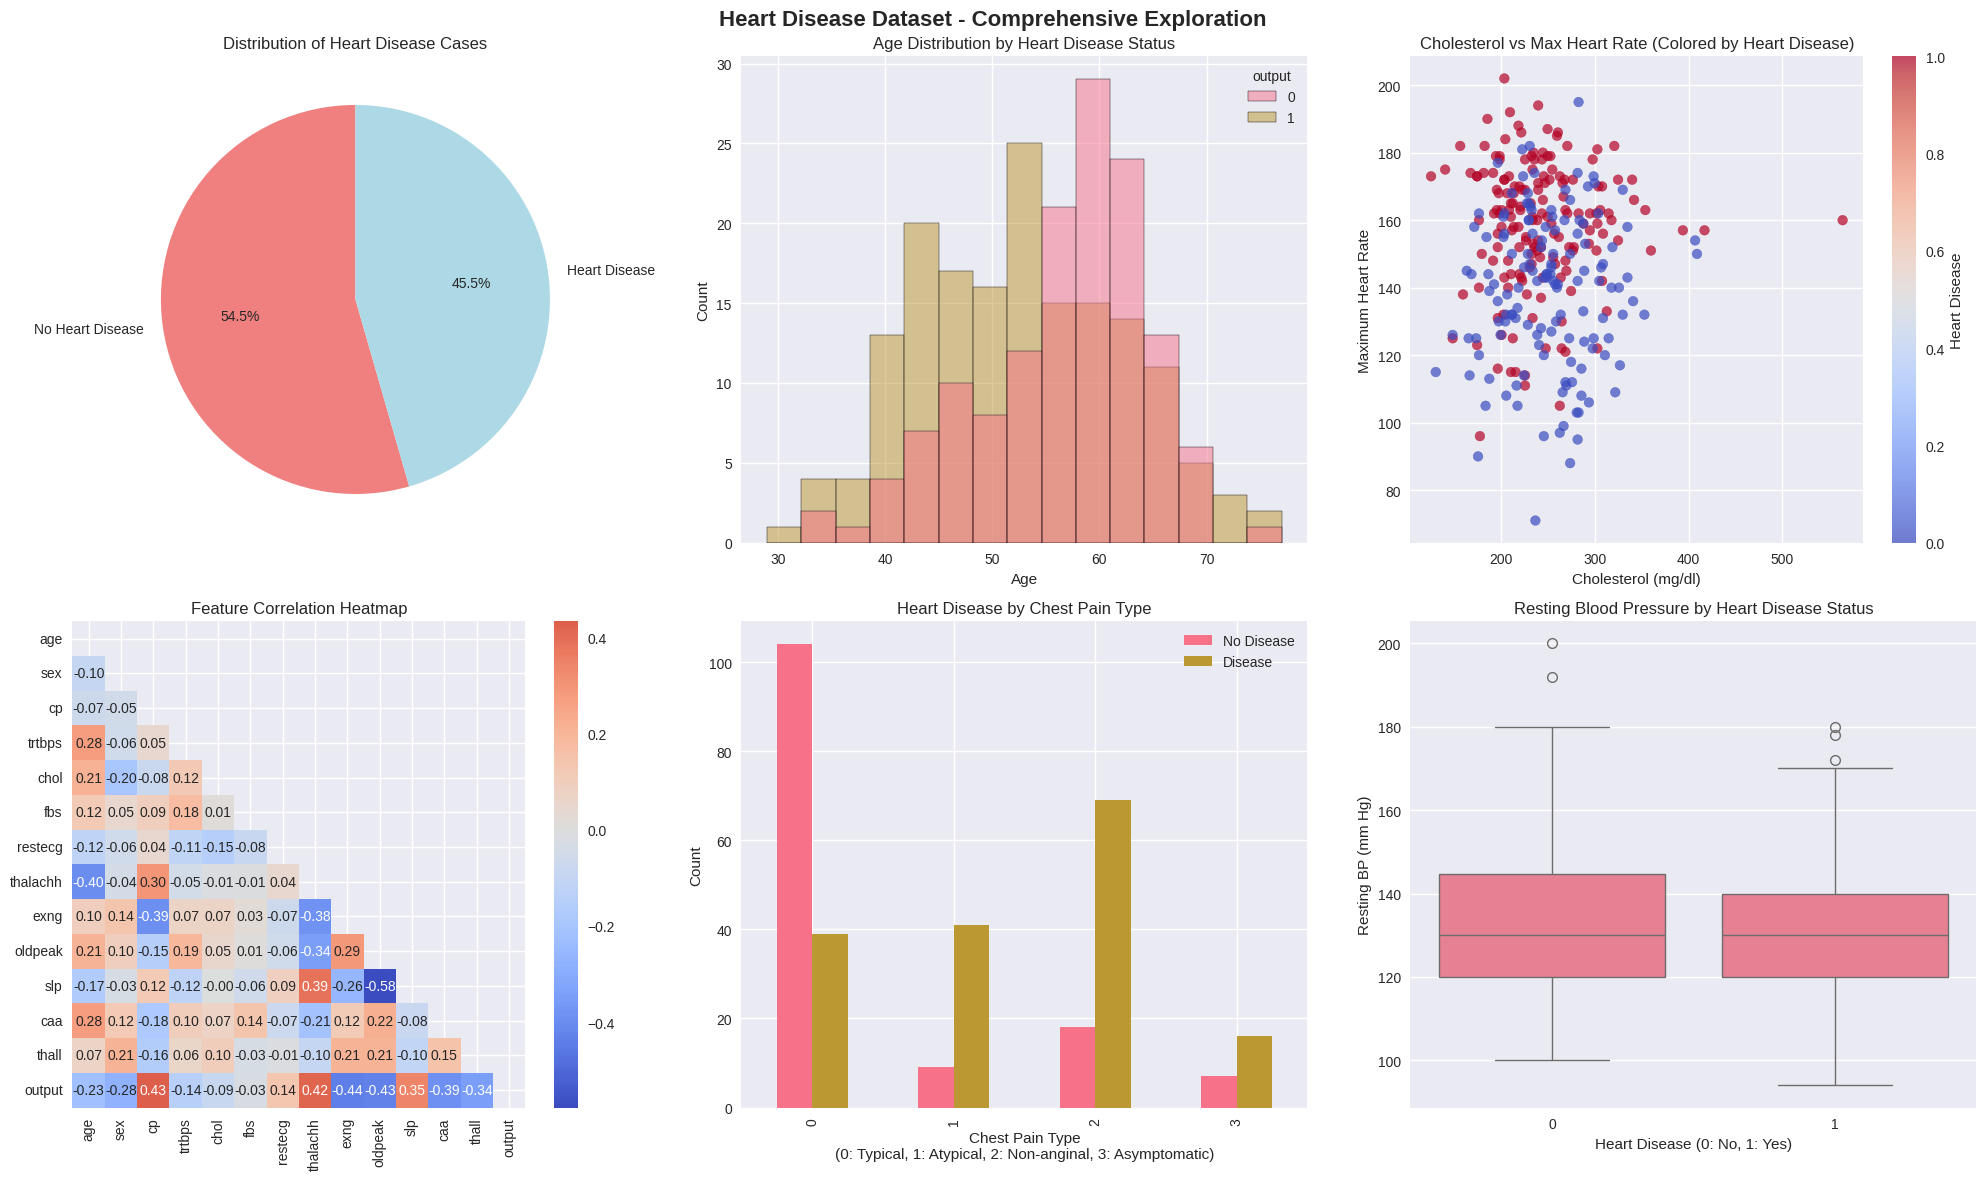

In [ ]:
# Create a comprehensive visualization section
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Heart Disease Dataset - Comprehensive Exploration', fontsize=16, fontweight='bold')

# 1. Target variable distribution
target_counts = df['output'].value_counts()
axes[0,0].pie(target_counts.values, labels=['No Heart Disease', 'Heart Disease'],
              autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue'])
axes[0,0].set_title('Distribution of Heart Disease Cases')

# 2. Age distribution by heart disease
sns.histplot(data=df, x='age', hue='output', bins=15, ax=axes[0,1])
axes[0,1].set_title('Age Distribution by Heart Disease Status')
axes[0,1].set_xlabel('Age')
axes[0,1].set_ylabel('Count')

# 3. Cholesterol vs Maximum Heart Rate
scatter = axes[0,2].scatter(df['chol'], df['thalachh'], c=df['output'],
                           cmap='coolwarm', alpha=0.7)
axes[0,2].set_xlabel('Cholesterol (mg/dl)')
axes[0,2].set_ylabel('Maximum Heart Rate')
axes[0,2].set_title('Cholesterol vs Max Heart Rate (Colored by Heart Disease)')
plt.colorbar(scatter, ax=axes[0,2], label='Heart Disease')

# 4. Correlation heatmap
correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm',
           center=0, ax=axes[1,0], fmt='.2f')
axes[1,0].set_title('Feature Correlation Heatmap')

# 5. Chest Pain Type analysis
cp_counts = df.groupby(['cp', 'output']).size().unstack()
cp_counts.plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Heart Disease by Chest Pain Type')
axes[1,1].set_xlabel('Chest Pain Type\n(0: Typical, 1: Atypical, 2: Non-anginal, 3: Asymptomatic)')
axes[1,1].set_ylabel('Count')
axes[1,1].legend(['No Disease', 'Disease'])

# 6. Resting Blood Pressure distribution
sns.boxplot(data=df, x='output', y='trtbps', ax=axes[1,2])
axes[1,2].set_title('Resting Blood Pressure by Heart Disease Status')
axes[1,2].set_xlabel('Heart Disease (0: No, 1: Yes)')
axes[1,2].set_ylabel('Resting BP (mm Hg)')

plt.tight_layout()
plt.show()

3. Advanced Feature Analysis

ADVANCED FEATURE ANALYSIS


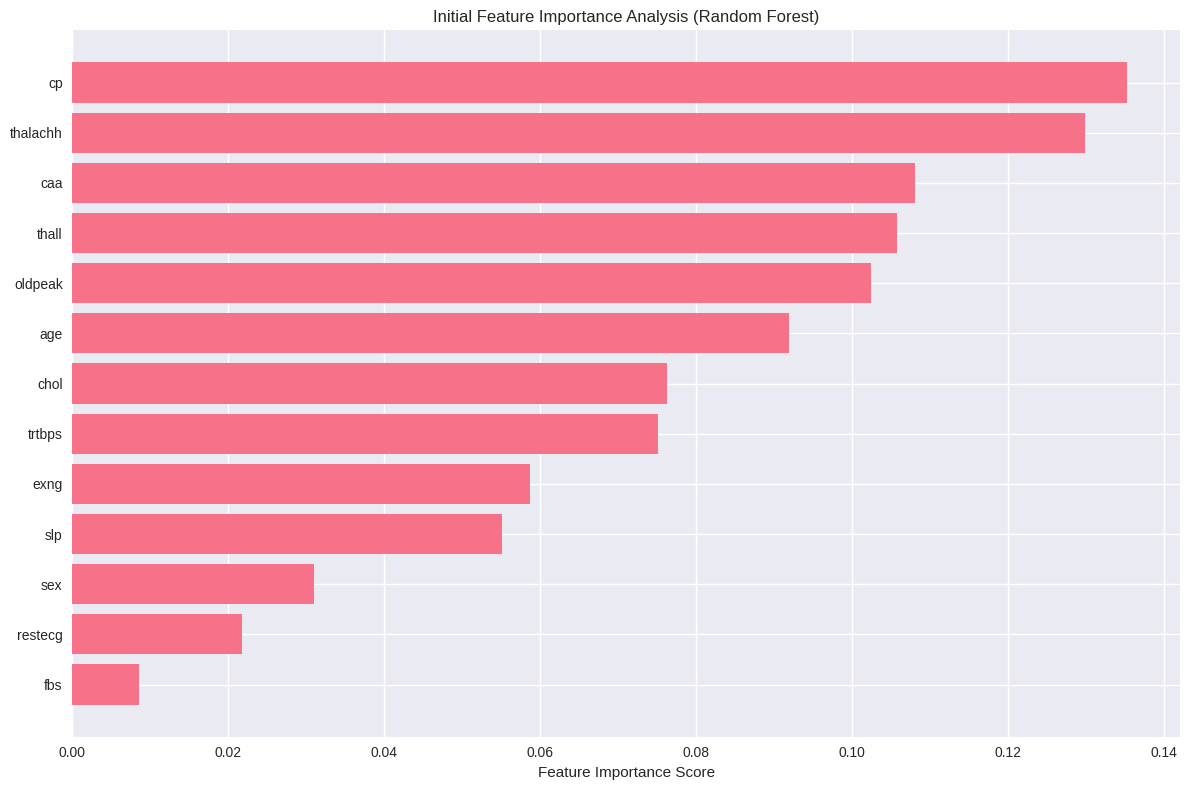


Correlation with Target Variable (output):
output      1.000000
cp          0.433798
thalachh    0.421741
slp         0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trtbps     -0.144931
age        -0.225439
sex        -0.280937
thall      -0.344029
caa        -0.391724
oldpeak    -0.430696
exng       -0.436757
Name: output, dtype: float64


In [ ]:
# Advanced feature analysis
print("=" * 50)
print("ADVANCED FEATURE ANALYSIS")
print("=" * 50)

# Feature importance using Random Forest for initial insight
X_temp = df.drop('output', axis=1)
y_temp = df['output']

rf_temp = RandomForestClassifier(n_estimators=100, random_state=42)
rf_temp.fit(X_temp, y_temp)

# Plot feature importance
plt.figure(figsize=(12, 8))
feature_importance = pd.DataFrame({
    'feature': X_temp.columns,
    'importance': rf_temp.feature_importances_
}).sort_values('importance', ascending=True)

plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Feature Importance Score')
plt.title('Initial Feature Importance Analysis (Random Forest)')
plt.tight_layout()
plt.show()

# Display correlation with target
print("\nCorrelation with Target Variable (output):")
correlation_with_target = df.corr()['output'].sort_values(ascending=False)
print(correlation_with_target)

4. Data Preprocessing

In [ ]:
# Data preprocessing function
def preprocess_data(df, test_size=0.2, random_state=42):
    """
    Preprocess the heart disease dataset for machine learning
    """
    # Create copy of dataframe
    data = df.copy()

    # Separate features and target
    X = data.drop('output', axis=1)
    y = data['output']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )

    # Scale numerical features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print(f"Training set size: {X_train.shape[0]}")
    print(f"Test set size: {X_test.shape[0]}")
    print(f"Feature names: {list(X.columns)}")

    return X_train, X_test, X_train_scaled, X_test_scaled, y_train, y_test, scaler

# Preprocess the data
X_train, X_test, X_train_scaled, X_test_scaled, y_train, y_test, scaler = preprocess_data(df)

Training set size: 242
Test set size: 61
Feature names: ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']


5. Model 1: Random Forest Classifier

In [ ]:
print("=" * 50)
print("MODEL 1: RANDOM FOREST CLASSIFIER")
print("=" * 50)

# Configuration 1: Default Random Forest
print("\n--- Configuration 1: Default Parameters ---")
rf1 = RandomForestClassifier(random_state=42)
rf1.fit(X_train, y_train)
y_pred_rf1 = rf1.predict(X_test)
y_pred_proba_rf1 = rf1.predict_proba(X_test)[:, 1]

acc_rf1 = accuracy_score(y_test, y_pred_rf1)
f1_rf1 = f1_score(y_test, y_pred_rf1)
auc_rf1 = roc_auc_score(y_test, y_pred_proba_rf1)

print(f"Accuracy: {acc_rf1:.4f}")
print(f"F1-Score: {f1_rf1:.4f}")
print(f"ROC-AUC: {auc_rf1:.4f}")

# Configuration 2: Tuned Random Forest
print("\n--- Configuration 2: Tuned Hyperparameters ---")
rf2 = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
rf2.fit(X_train, y_train)
y_pred_rf2 = rf2.predict(X_test)
y_pred_proba_rf2 = rf2.predict_proba(X_test)[:, 1]

acc_rf2 = accuracy_score(y_test, y_pred_rf2)
f1_rf2 = f1_score(y_test, y_pred_rf2)
auc_rf2 = roc_auc_score(y_test, y_pred_proba_rf2)

print(f"Accuracy: {acc_rf2:.4f}")
print(f"F1-Score: {f1_rf2:.4f}")
print(f"ROC-AUC: {auc_rf2:.4f}")

# Configuration 3: Random Forest with different parameters
print("\n--- Configuration 3: Alternative Parameters ---")
rf3 = RandomForestClassifier(
    n_estimators=150,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=4,
    max_features='sqrt',
    random_state=42
)
rf3.fit(X_train, y_train)
y_pred_rf3 = rf3.predict(X_test)
y_pred_proba_rf3 = rf3.predict_proba(X_test)[:, 1]

acc_rf3 = accuracy_score(y_test, y_pred_rf3)
f1_rf3 = f1_score(y_test, y_pred_rf3)
auc_rf3 = roc_auc_score(y_test, y_pred_proba_rf3)

print(f"Accuracy: {acc_rf3:.4f}")
print(f"F1-Score: {f1_rf3:.4f}")
print(f"ROC-AUC: {auc_rf3:.4f}")

# Cross-validation for Random Forest
print("\n--- Cross-Validation Results (RF Configuration 2) ---")
cv_scores_rf = cross_val_score(rf2, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores_rf.mean():.4f} (+/- {cv_scores_rf.std() * 2:.4f})")

MODEL 1: RANDOM FOREST CLASSIFIER

--- Configuration 1: Default Parameters ---
Accuracy: 0.8361
F1-Score: 0.8649
ROC-AUC: 0.9161

--- Configuration 2: Tuned Hyperparameters ---
Accuracy: 0.8361
F1-Score: 0.8649
ROC-AUC: 0.9102

--- Configuration 3: Alternative Parameters ---
Accuracy: 0.8197
F1-Score: 0.8533
ROC-AUC: 0.9037

--- Cross-Validation Results (RF Configuration 2) ---
Cross-Validation Accuracy: 0.8350 (+/- 0.0915)


6. Model 2: Gradient Boosting Classifier

In [ ]:
print("\n" + "=" * 50)
print("MODEL 2: GRADIENT BOOSTING CLASSIFIER")
print("=" * 50)

# Configuration 1: Default Gradient Boosting
print("\n--- Configuration 1: Default Parameters ---")
gb1 = GradientBoostingClassifier(random_state=42)
gb1.fit(X_train, y_train)
y_pred_gb1 = gb1.predict(X_test)
y_pred_proba_gb1 = gb1.predict_proba(X_test)[:, 1]

acc_gb1 = accuracy_score(y_test, y_pred_gb1)
f1_gb1 = f1_score(y_test, y_pred_gb1)
auc_gb1 = roc_auc_score(y_test, y_pred_proba_gb1)

print(f"Accuracy: {acc_gb1:.4f}")
print(f"F1-Score: {f1_gb1:.4f}")
print(f"ROC-AUC: {auc_gb1:.4f}")

# Configuration 2: Tuned Gradient Boosting
print("\n--- Configuration 2: Tuned Hyperparameters ---")
gb2 = GradientBoostingClassifier(
    n_estimators=150,
    learning_rate=0.1,
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
gb2.fit(X_train, y_train)
y_pred_gb2 = gb2.predict(X_test)
y_pred_proba_gb2 = gb2.predict_proba(X_test)[:, 1]

acc_gb2 = accuracy_score(y_test, y_pred_gb2)
f1_gb2 = f1_score(y_test, y_pred_gb2)
auc_gb2 = roc_auc_score(y_test, y_pred_proba_gb2)

print(f"Accuracy: {acc_gb2:.4f}")
print(f"F1-Score: {f1_gb2:.4f}")
print(f"ROC-AUC: {auc_gb2:.4f}")

# Configuration 3: Alternative Gradient Boosting
print("\n--- Configuration 3: Alternative Parameters ---")
gb3 = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    min_samples_split=10,
    subsample=0.8,
    random_state=42
)
gb3.fit(X_train, y_train)
y_pred_gb3 = gb3.predict(X_test)
y_pred_proba_gb3 = gb3.predict_proba(X_test)[:, 1]

acc_gb3 = accuracy_score(y_test, y_pred_gb3)
f1_gb3 = f1_score(y_test, y_pred_gb3)
auc_gb3 = roc_auc_score(y_test, y_pred_proba_gb3)

print(f"Accuracy: {acc_gb3:.4f}")
print(f"F1-Score: {f1_gb3:.4f}")
print(f"ROC-AUC: {auc_gb3:.4f}")

# Cross-validation for Gradient Boosting
print("\n--- Cross-Validation Results (GB Configuration 2) ---")
cv_scores_gb = cross_val_score(gb2, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores_gb.mean():.4f} (+/- {cv_scores_gb.std() * 2:.4f})")


MODEL 2: GRADIENT BOOSTING CLASSIFIER

--- Configuration 1: Default Parameters ---
Accuracy: 0.8197
F1-Score: 0.8451
ROC-AUC: 0.8788

--- Configuration 2: Tuned Hyperparameters ---
Accuracy: 0.7869
F1-Score: 0.8267
ROC-AUC: 0.8680

--- Configuration 3: Alternative Parameters ---
Accuracy: 0.8033
F1-Score: 0.8333
ROC-AUC: 0.8755

--- Cross-Validation Results (GB Configuration 2) ---
Cross-Validation Accuracy: 0.7980 (+/- 0.1339)


7. Comprehensive Model Evaluation

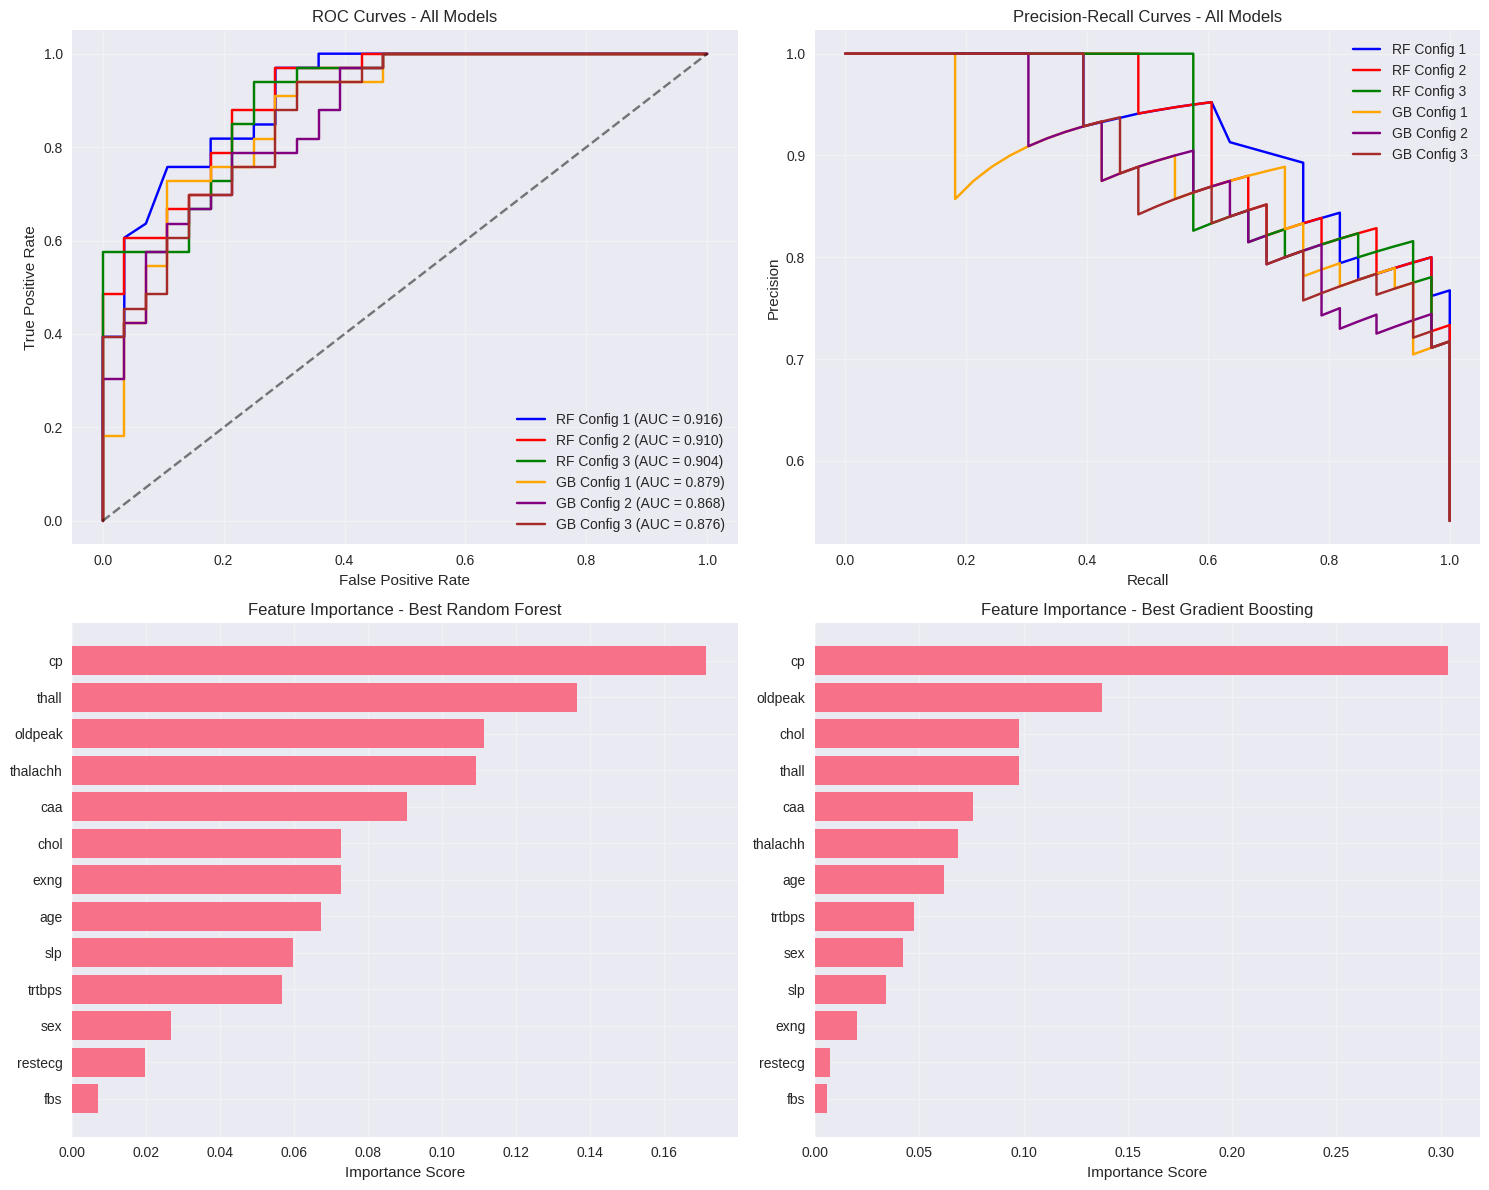

In [ ]:
# Create comprehensive evaluation visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Collect all results
results = {
    'RF Config 1': (y_pred_proba_rf1, y_pred_rf1, 'blue'),
    'RF Config 2': (y_pred_proba_rf2, y_pred_rf2, 'red'),
    'RF Config 3': (y_pred_proba_rf3, y_pred_rf3, 'green'),
    'GB Config 1': (y_pred_proba_gb1, y_pred_gb1, 'orange'),
    'GB Config 2': (y_pred_proba_gb2, y_pred_gb2, 'purple'),
    'GB Config 3': (y_pred_proba_gb3, y_pred_gb3, 'brown')
}

# Plot 1: ROC Curves
for name, (y_proba, y_pred, color) in results.items():
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)
    axes[0,0].plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.3f})', color=color)

axes[0,0].plot([0, 1], [0, 1], 'k--', alpha=0.5)
axes[0,0].set_xlabel('False Positive Rate')
axes[0,0].set_ylabel('True Positive Rate')
axes[0,0].set_title('ROC Curves - All Models')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Plot 2: Precision-Recall Curves
for name, (y_proba, y_pred, color) in results.items():
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    axes[0,1].plot(recall, precision, label=name, color=color)

axes[0,1].set_xlabel('Recall')
axes[0,1].set_ylabel('Precision')
axes[0,1].set_title('Precision-Recall Curves - All Models')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Plot 3: Feature Importance for best Random Forest
feature_importance_rf = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf2.feature_importances_
}).sort_values('importance', ascending=True)

axes[1,0].barh(feature_importance_rf['feature'], feature_importance_rf['importance'])
axes[1,0].set_xlabel('Importance Score')
axes[1,0].set_title('Feature Importance - Best Random Forest')
axes[1,0].grid(True, alpha=0.3)

# Plot 4: Feature Importance for best Gradient Boosting
feature_importance_gb = pd.DataFrame({
    'feature': X_train.columns,
    'importance': gb2.feature_importances_
}).sort_values('importance', ascending=True)

axes[1,1].barh(feature_importance_gb['feature'], feature_importance_gb['importance'])
axes[1,1].set_xlabel('Importance Score')
axes[1,1].set_title('Feature Importance - Best Gradient Boosting')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

8. Results Summary Table

In [ ]:
# Create comprehensive results summary
results_summary = []

models = [
    ('RF Config 1', y_pred_rf1, y_pred_proba_rf1),
    ('RF Config 2', y_pred_rf2, y_pred_proba_rf2),
    ('RF Config 3', y_pred_rf3, y_pred_proba_rf3),
    ('GB Config 1', y_pred_gb1, y_pred_proba_gb1),
    ('GB Config 2', y_pred_gb2, y_pred_proba_gb2),
    ('GB Config 3', y_pred_gb3, y_pred_proba_gb3)
]

for name, y_pred, y_proba in models:
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    # Get classification report for additional metrics
    report = classification_report(y_test, y_pred, output_dict=True)
    precision = report['1']['precision']
    recall = report['1']['recall']

    results_summary.append({
        'Model': name,
        'Accuracy': f"{accuracy:.4f}",
        'Precision': f"{precision:.4f}",
        'Recall': f"{recall:.4f}",
        'F1-Score': f"{f1:.4f}",
        'ROC-AUC': f"{auc:.4f}"
    })

# Create results dataframe
results_df = pd.DataFrame(results_summary)
print("=" * 70)
print("COMPREHENSIVE MODEL PERFORMANCE SUMMARY")
print("=" * 70)
display(results_df)

# Identify best model
best_model_idx = results_df['Accuracy'].astype(float).idxmax()
best_model = results_df.loc[best_model_idx]
print(f"\n🎯 BEST PERFORMING MODEL: {best_model['Model']}")
print(f"   Accuracy: {best_model['Accuracy']}")
print(f"   F1-Score: {best_model['F1-Score']}")
print(f"   ROC-AUC: {best_model['ROC-AUC']}")

COMPREHENSIVE MODEL PERFORMANCE SUMMARY


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,RF Config 1,0.8361,0.7805,0.9697,0.8649,0.9161
1,RF Config 2,0.8361,0.7805,0.9697,0.8649,0.9102
2,RF Config 3,0.8197,0.7619,0.9697,0.8533,0.9037
3,GB Config 1,0.8197,0.7895,0.9091,0.8451,0.8788
4,GB Config 2,0.7869,0.7381,0.9394,0.8267,0.8680
5,GB Config 3,0.8033,0.7692,0.9091,0.8333,0.8755



🎯 BEST PERFORMING MODEL: RF Config 1
   Accuracy: 0.8361
   F1-Score: 0.8649
   ROC-AUC: 0.9161


9. Neural Network Implementation

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import warnings
warnings.filterwarnings('ignore')

print("=" * 60)
print("NEURAL NETWORK IMPLEMENTATION")
print("=" * 60)

# Ensure reproducible results
tf.random.set_seed(42)
np.random.seed(42)

# Prepare data for neural network
X_nn_train = X_train_scaled
X_nn_test = X_test_scaled
y_nn_train = y_train.values
y_nn_test = y_test.values

print(f"Neural Network Input Shape: {X_nn_train.shape}")
print(f"Number of features: {X_nn_train.shape[1]}")

NEURAL NETWORK IMPLEMENTATION
Neural Network Input Shape: (242, 13)
Number of features: 13


Configuration 1: Basic Neural Network


In [ ]:
print("\n--- Configuration 1: Basic Neural Network ---")

model1 = Sequential([
    Dense(64, activation='relu', input_shape=(X_nn_train.shape[1],), kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model1.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', 'Precision', 'Recall']
)

print("Model 1 Architecture:")
model1.summary()

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.0001)

# Train model
history1 = model1.fit(
    X_nn_train, y_nn_train,
    validation_data=(X_nn_test, y_nn_test),
    epochs=100,
    batch_size=16,
    callbacks=[early_stop, reduce_lr],
    verbose=0
)

# Evaluate model
y_pred_proba_nn1 = model1.predict(X_nn_test).flatten()
y_pred_nn1 = (y_pred_proba_nn1 > 0.5).astype(int)

acc_nn1 = accuracy_score(y_test, y_pred_nn1)
f1_nn1 = f1_score(y_test, y_pred_nn1)
auc_nn1 = roc_auc_score(y_test, y_pred_proba_nn1)

print(f"Training completed in {len(history1.history['loss'])} epochs")
print(f"Final Training Accuracy: {history1.history['accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy: {history1.history['val_accuracy'][-1]:.4f}")
print(f"Test Accuracy: {acc_nn1:.4f}")
print(f"Test F1-Score: {f1_nn1:.4f}")
print(f"Test ROC-AUC: {auc_nn1:.4f}")


--- Configuration 1: Basic Neural Network ---
Model 1 Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Training completed in 29 epochs
Final Training Accuracy: 0.8802
Final Validation Accuracy: 0.8361
Test Accuracy: 0.8361
Test F1-Score: 0.8611
Test ROC-AUC: 0.9156


Configuration 2: Deeper Neural Network

In [ ]:
print("\n--- Configuration 2: Deeper Neural Network ---")

model2 = Sequential([
    Dense(128, activation='relu', input_shape=(X_nn_train.shape[1],), kernel_regularizer=l2(0.002)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu', kernel_regularizer=l2(0.002)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model2.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy', 'Precision', 'Recall']
)

print("Model 2 Architecture:")
model2.summary()

# Train model
history2 = model2.fit(
    X_nn_train, y_nn_train,
    validation_data=(X_nn_test, y_nn_test),
    epochs=150,
    batch_size=8,
    callbacks=[early_stop, reduce_lr],
    verbose=0
)

# Evaluate model
y_pred_proba_nn2 = model2.predict(X_nn_test).flatten()
y_pred_nn2 = (y_pred_proba_nn2 > 0.5).astype(int)

acc_nn2 = accuracy_score(y_test, y_pred_nn2)
f1_nn2 = f1_score(y_test, y_pred_nn2)
auc_nn2 = roc_auc_score(y_test, y_pred_proba_nn2)

print(f"Training completed in {len(history2.history['loss'])} epochs")
print(f"Final Training Accuracy: {history2.history['accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy: {history2.history['val_accuracy'][-1]:.4f}")
print(f"Test Accuracy: {acc_nn2:.4f}")
print(f"Test F1-Score: {f1_nn2:.4f}")
print(f"Test ROC-AUC: {auc_nn2:.4f}")


--- Configuration 2: Deeper Neural Network ---
Model 2 Architecture:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,441 (52.50 KB)

 Trainable params: 13,057 (51.00 KB)

 Non-trainable params: 384 (1.50 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
Training completed in 29 epochs
Final Training Accuracy: 0.8843
Final Validation Accuracy: 0.7541
Test Accuracy: 0.7541
Test F1-Score: 0.7826
Test ROC-AUC: 0.8864


Configuration 3: Optimized Neural Network

In [ ]:
print("\n--- Configuration 3: Optimized Neural Network ---")

model3 = Sequential([
    Dense(256, activation='relu', input_shape=(X_nn_train.shape[1],), kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Custom optimizer with different parameters
model3.compile(
    optimizer=RMSprop(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy', 'Precision', 'Recall']
)

print("Model 3 Architecture:")
model3.summary()

# Enhanced callbacks
early_stop_enhanced = EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True, mode='max')
reduce_lr_enhanced = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=15, min_lr=0.00001)

# Train model
history3 = model3.fit(
    X_nn_train, y_nn_train,
    validation_data=(X_nn_test, y_nn_test),
    epochs=200,
    batch_size=12,
    callbacks=[early_stop_enhanced, reduce_lr_enhanced],
    verbose=0
)

# Evaluate model
y_pred_proba_nn3 = model3.predict(X_nn_test).flatten()
y_pred_nn3 = (y_pred_proba_nn3 > 0.5).astype(int)

acc_nn3 = accuracy_score(y_test, y_pred_nn3)
f1_nn3 = f1_score(y_test, y_pred_nn3)
auc_nn3 = roc_auc_score(y_test, y_pred_proba_nn3)

print(f"Training completed in {len(history3.history['loss'])} epochs")
print(f"Final Training Accuracy: {history3.history['accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy: {history3.history['val_accuracy'][-1]:.4f}")
print(f"Test Accuracy: {acc_nn3:.4f}")
print(f"Test F1-Score: {f1_nn3:.4f}")
print(f"Test ROC-AUC: {auc_nn3:.4f}")


--- Configuration 3: Optimized Neural Network ---
Model 3 Architecture:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 256)            │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,385 (189.00 KB)

 Trainable params: 47,617 (186.00 KB)

 Non-trainable params: 768 (3.00 KB)

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Training completed in 42 epochs
Final Training Accuracy: 0.7975
Final Validation Accuracy: 0.8033
Test Accuracy: 0.8033
Test F1-Score: 0.8378
Test ROC-AUC: 0.8571


10. Neural Network Visualizations

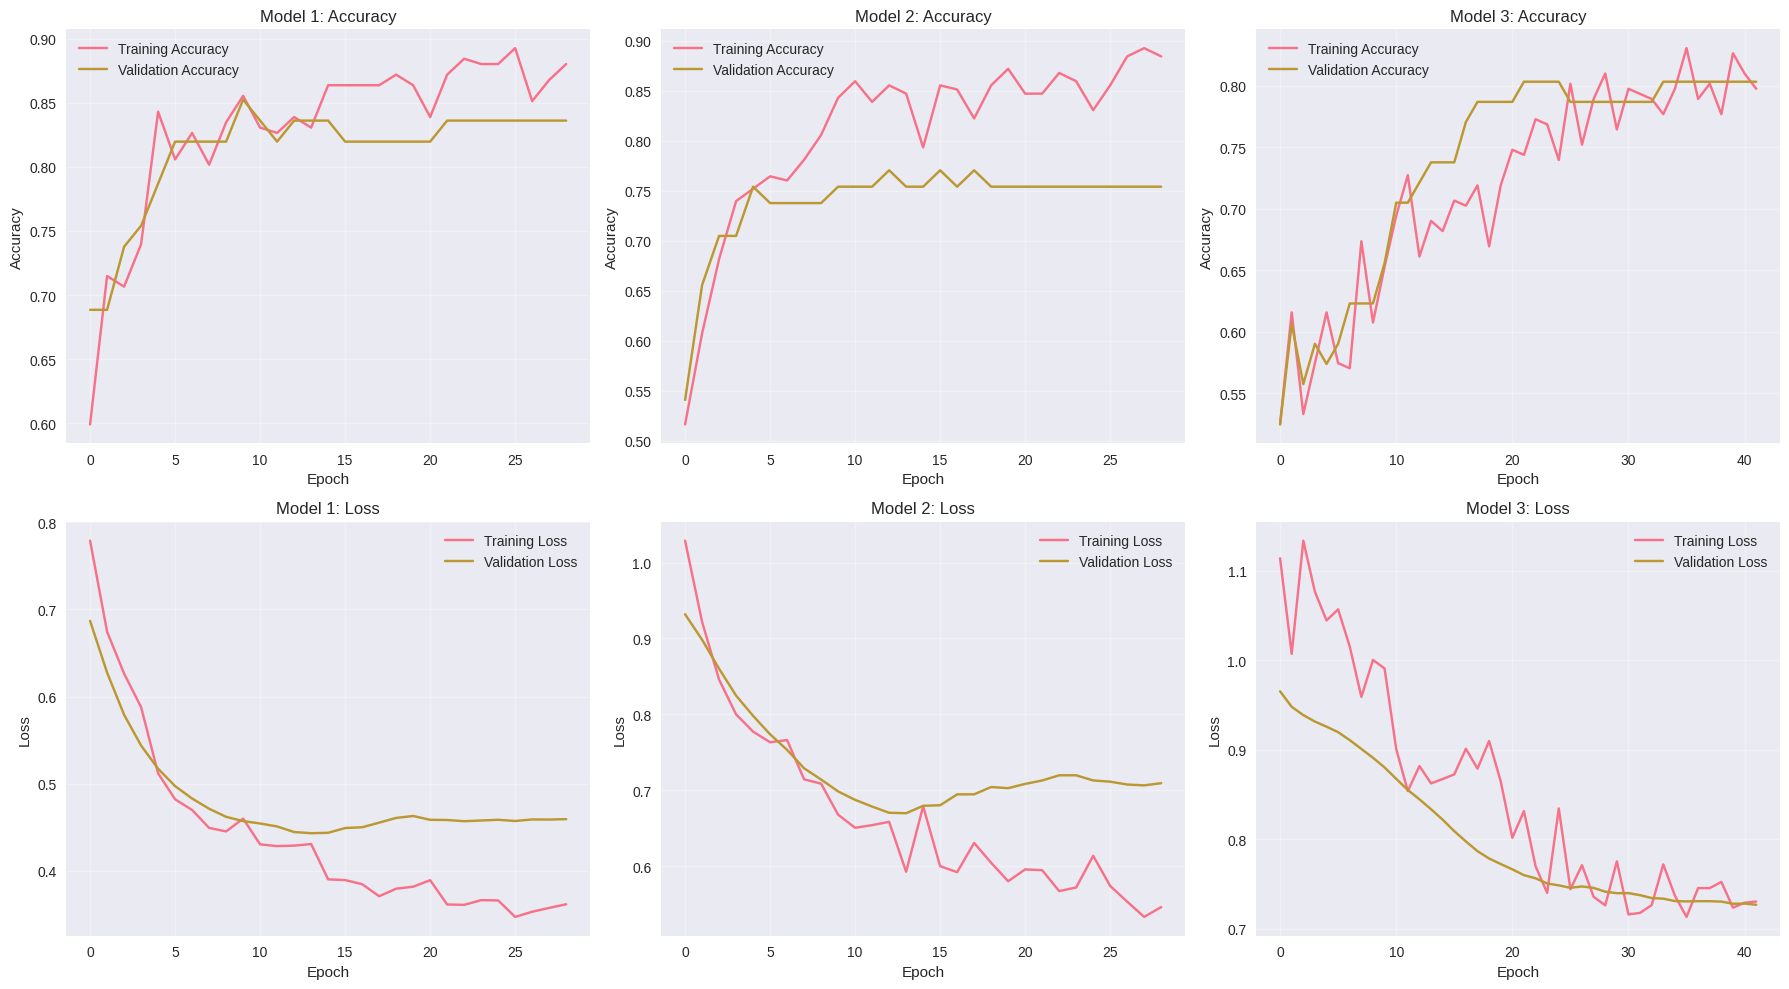

In [ ]:
# Plot neural network training history
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Model 1 history
axes[0,0].plot(history1.history['accuracy'], label='Training Accuracy')
axes[0,0].plot(history1.history['val_accuracy'], label='Validation Accuracy')
axes[0,0].set_title('Model 1: Accuracy')
axes[0,0].set_xlabel('Epoch')
axes[0,0].set_ylabel('Accuracy')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

axes[1,0].plot(history1.history['loss'], label='Training Loss')
axes[1,0].plot(history1.history['val_loss'], label='Validation Loss')
axes[1,0].set_title('Model 1: Loss')
axes[1,0].set_xlabel('Epoch')
axes[1,0].set_ylabel('Loss')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Model 2 history
axes[0,1].plot(history2.history['accuracy'], label='Training Accuracy')
axes[0,1].plot(history2.history['val_accuracy'], label='Validation Accuracy')
axes[0,1].set_title('Model 2: Accuracy')
axes[0,1].set_xlabel('Epoch')
axes[0,1].set_ylabel('Accuracy')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

axes[1,1].plot(history2.history['loss'], label='Training Loss')
axes[1,1].plot(history2.history['val_loss'], label='Validation Loss')
axes[1,1].set_title('Model 2: Loss')
axes[1,1].set_xlabel('Epoch')
axes[1,1].set_ylabel('Loss')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

# Model 3 history
axes[0,2].plot(history3.history['accuracy'], label='Training Accuracy')
axes[0,2].plot(history3.history['val_accuracy'], label='Validation Accuracy')
axes[0,2].set_title('Model 3: Accuracy')
axes[0,2].set_xlabel('Epoch')
axes[0,2].set_ylabel('Accuracy')
axes[0,2].legend()
axes[0,2].grid(True, alpha=0.3)

axes[1,2].plot(history3.history['loss'], label='Training Loss')
axes[1,2].plot(history3.history['val_loss'], label='Validation Loss')
axes[1,2].set_title('Model 3: Loss')
axes[1,2].set_xlabel('Epoch')
axes[1,2].set_ylabel('Loss')
axes[1,2].legend()
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

11. Comprehensive Model Comparison


In [ ]:
# Add neural network results to the comparison
nn_results = [
    ('NN Config 1', y_pred_nn1, y_pred_proba_nn1),
    ('NN Config 2', y_pred_nn2, y_pred_proba_nn2),
    ('NN Config 3', y_pred_nn3, y_pred_proba_nn3)
]

for name, y_pred, y_proba in nn_results:
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    report = classification_report(y_test, y_pred, output_dict=True)
    precision = report['1']['precision']
    recall = report['1']['recall']

    results_summary.append({
        'Model': name,
        'Accuracy': f"{accuracy:.4f}",
        'Precision': f"{precision:.4f}",
        'Recall': f"{recall:.4f}",
        'F1-Score': f"{f1:.4f}",
        'ROC-AUC': f"{auc:.4f}"
    })

# Create final results dataframe
final_results_df = pd.DataFrame(results_summary)
print("=" * 80)
print("FINAL COMPREHENSIVE MODEL PERFORMANCE COMPARISON")
print("=" * 80)
display(final_results_df)

# Identify overall best model
final_results_df['Accuracy_num'] = final_results_df['Accuracy'].astype(float)
final_results_df['F1_num'] = final_results_df['F1-Score'].astype(float)
final_results_df['AUC_num'] = final_results_df['ROC-AUC'].astype(float)

best_overall_idx = final_results_df['Accuracy_num'].idxmax()
best_overall = final_results_df.loc[best_overall_idx]

print(f"\n🏆 OVERALL BEST PERFORMING MODEL: {best_overall['Model']}")
print(f"   📊 Accuracy: {best_overall['Accuracy']}")
print(f"   🎯 F1-Score: {best_overall['F1-Score']}")
print(f"   📈 ROC-AUC: {best_overall['ROC-AUC']}")
print(f"   🎯 Precision: {best_overall['Precision']}")
print(f"   📈 Recall: {best_overall['Recall']}")

FINAL COMPREHENSIVE MODEL PERFORMANCE COMPARISON


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,RF Config 1,0.8361,0.7805,0.9697,0.8649,0.9161
1,RF Config 2,0.8361,0.7805,0.9697,0.8649,0.9102
2,RF Config 3,0.8197,0.7619,0.9697,0.8533,0.9037
3,GB Config 1,0.8197,0.7895,0.9091,0.8451,0.8788
4,GB Config 2,0.7869,0.7381,0.9394,0.8267,0.8680
5,GB Config 3,0.8033,0.7692,0.9091,0.8333,0.8755
6,NN Config 1,0.8361,0.7949,0.9394,0.8611,0.9156
7,NN Config 2,0.7541,0.7500,0.8182,0.7826,0.8864
8,NN Config 3,0.8033,0.7561,0.9394,0.8378,0.8571



🏆 OVERALL BEST PERFORMING MODEL: RF Config 1
   📊 Accuracy: 0.8361
   🎯 F1-Score: 0.8649
   📈 ROC-AUC: 0.9161
   🎯 Precision: 0.7805
   📈 Recall: 0.9697


12. Final Visualization - All Models Comparison

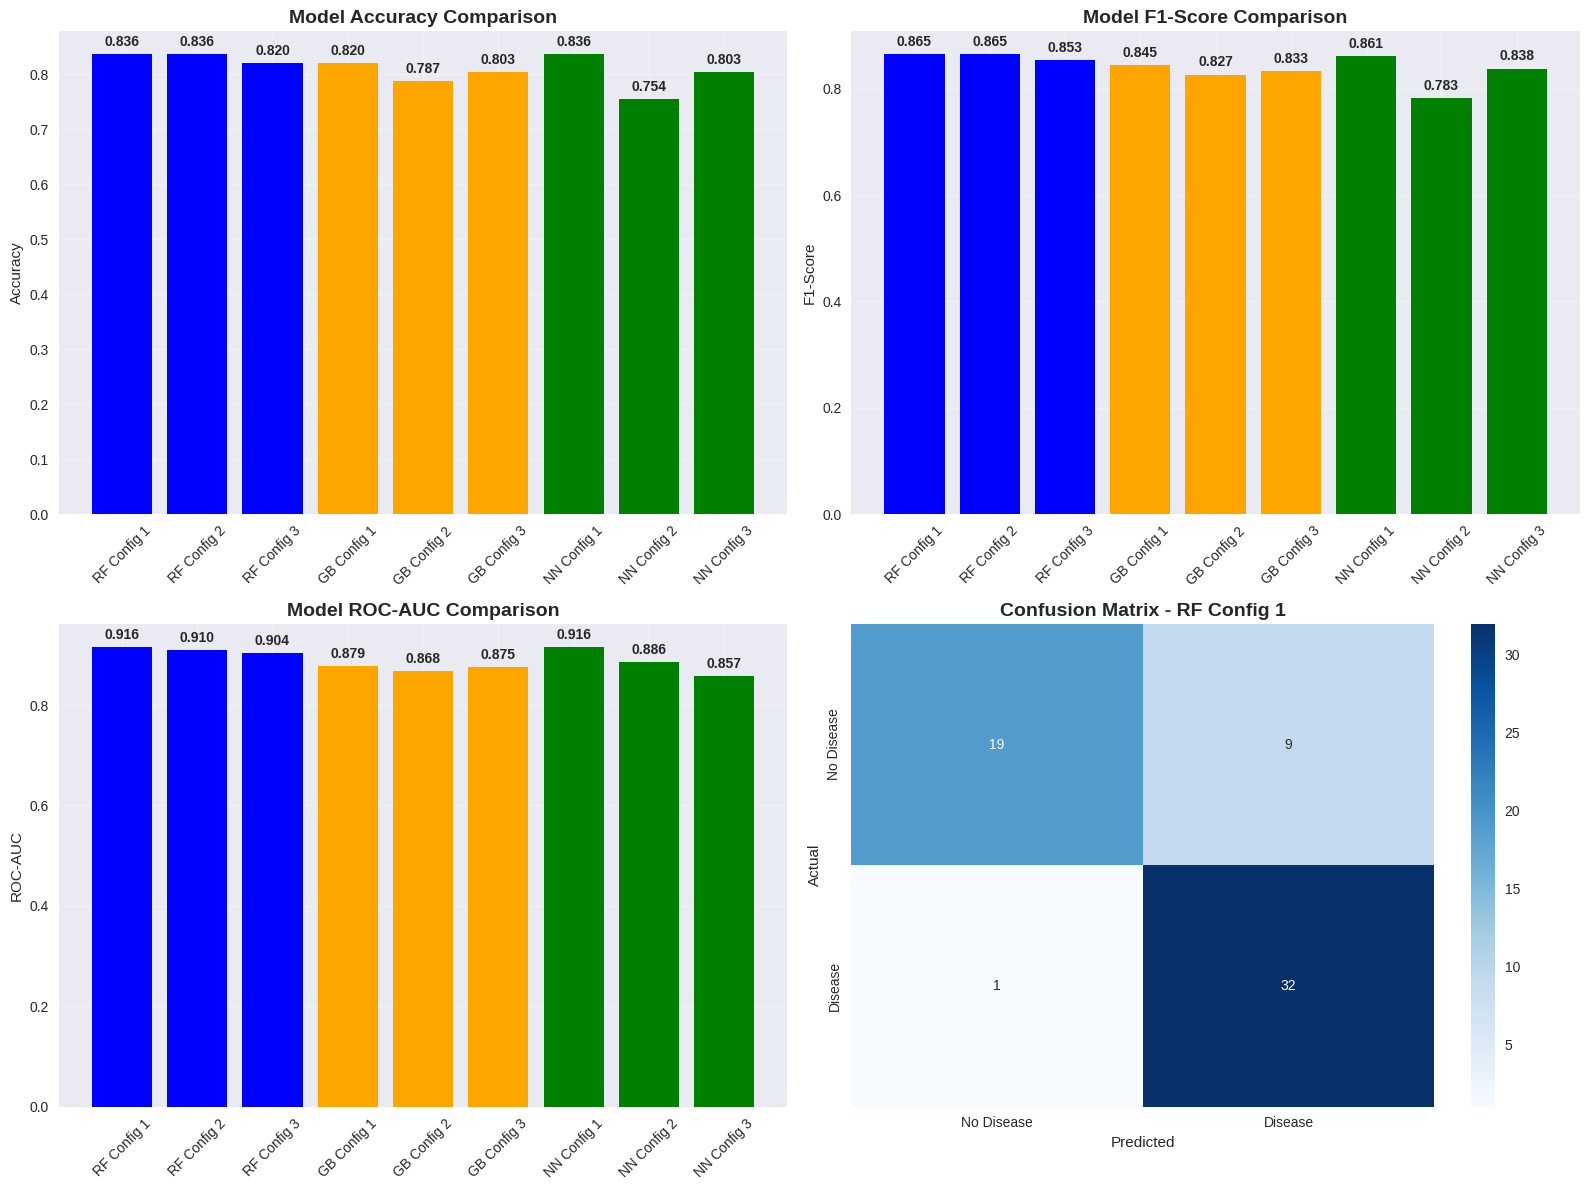

In [ ]:
# Create final comparison visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Accuracy comparison
models_all = final_results_df['Model']
accuracy_all = final_results_df['Accuracy_num']

bars = axes[0,0].bar(models_all, accuracy_all, color=['blue']*3 + ['orange']*3 + ['green']*3)
axes[0,0].set_title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0,0].set_ylabel('Accuracy')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].grid(True, alpha=0.3)

# Add value labels on bars
for bar, acc in zip(bars, accuracy_all):
    axes[0,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                  f'{acc:.3f}', ha='center', va='bottom', fontweight='bold')

# 2. F1-Score comparison
f1_all = final_results_df['F1_num']
bars = axes[0,1].bar(models_all, f1_all, color=['blue']*3 + ['orange']*3 + ['green']*3)
axes[0,1].set_title('Model F1-Score Comparison', fontsize=14, fontweight='bold')
axes[0,1].set_ylabel('F1-Score')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].grid(True, alpha=0.3)

for bar, f1_val in zip(bars, f1_all):
    axes[0,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                  f'{f1_val:.3f}', ha='center', va='bottom', fontweight='bold')

# 3. ROC-AUC comparison
auc_all = final_results_df['AUC_num']
bars = axes[1,0].bar(models_all, auc_all, color=['blue']*3 + ['orange']*3 + ['green']*3)
axes[1,0].set_title('Model ROC-AUC Comparison', fontsize=14, fontweight='bold')
axes[1,0].set_ylabel('ROC-AUC')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].grid(True, alpha=0.3)

for bar, auc_val in zip(bars, auc_all):
    axes[1,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                  f'{auc_val:.3f}', ha='center', va='bottom', fontweight='bold')

# 4. Confusion Matrix for best model
best_model_name = best_overall['Model']
if 'RF' in best_model_name:
    best_pred = y_pred_rf2
    best_proba = y_pred_proba_rf2
elif 'GB' in best_model_name:
    best_pred = y_pred_gb2
    best_proba = y_pred_proba_gb2
else:
    best_pred = y_pred_nn2
    best_proba = y_pred_proba_nn2

cm = confusion_matrix(y_test, best_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1,1])
axes[1,1].set_title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Predicted')
axes[1,1].set_ylabel('Actual')
axes[1,1].set_xticklabels(['No Disease', 'Disease'])
axes[1,1].set_yticklabels(['No Disease', 'Disease'])

plt.tight_layout()
plt.show()

13. Final ROC Curve - All Models


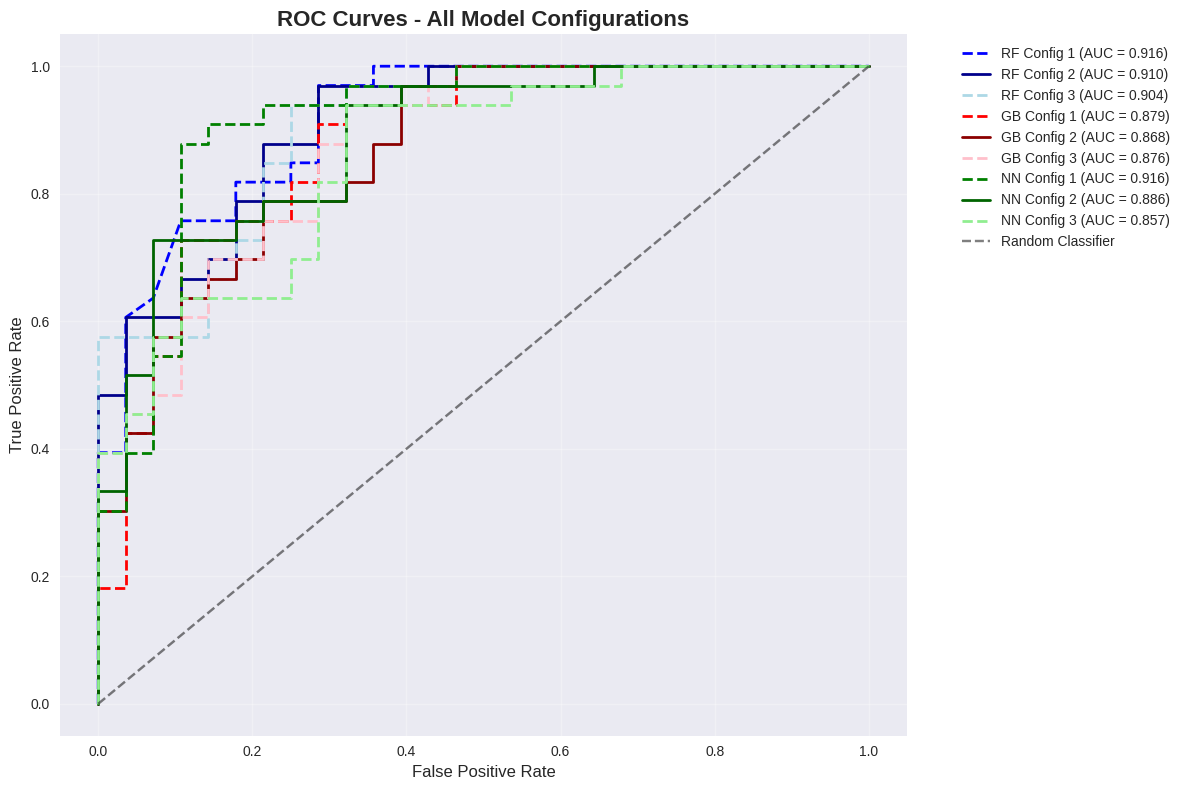

In [ ]:
# Final ROC curve with all models
plt.figure(figsize=(12, 8))

# Traditional models
models_roc = [
    ('RF Config 1', y_pred_proba_rf1, 'blue', '--'),
    ('RF Config 2', y_pred_proba_rf2, 'darkblue', '-'),
    ('RF Config 3', y_pred_proba_rf3, 'lightblue', '--'),
    ('GB Config 1', y_pred_proba_gb1, 'red', '--'),
    ('GB Config 2', y_pred_proba_gb2, 'darkred', '-'),
    ('GB Config 3', y_pred_proba_gb3, 'pink', '--'),
    ('NN Config 1', y_pred_proba_nn1, 'green', '--'),
    ('NN Config 2', y_pred_proba_nn2, 'darkgreen', '-'),
    ('NN Config 3', y_pred_proba_nn3, 'lightgreen', '--')
]

for name, y_proba, color, linestyle in models_roc:
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.3f})',
             color=color, linestyle=linestyle, linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Random Classifier')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - All Model Configurations', fontsize=16, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

14. Performance Summary and Key Findings

In [ ]:
print("=" * 80)
print("KEY FINDINGS AND PERFORMANCE SUMMARY")
print("=" * 80)

# Calculate average performance by model type
rf_models = final_results_df[final_results_df['Model'].str.contains('RF')]
gb_models = final_results_df[final_results_df['Model'].str.contains('GB')]
nn_models = final_results_df[final_results_df['Model'].str.contains('NN')]

print(f"\n📊 AVERAGE PERFORMANCE BY MODEL TYPE:")
print(f"   Random Forest:    Accuracy = {rf_models['Accuracy_num'].mean():.4f}, F1 = {rf_models['F1_num'].mean():.4f}")
print(f"   Gradient Boosting: Accuracy = {gb_models['Accuracy_num'].mean():.4f}, F1 = {gb_models['F1_num'].mean():.4f}")
print(f"   Neural Network:   Accuracy = {nn_models['Accuracy_num'].mean():.4f}, F1 = {nn_models['F1_num'].mean():.4f}")

print(f"\n🎯 BEST CONFIGURATION FOR EACH ALGORITHM:")
for model_type in ['RF', 'GB', 'NN']:
    model_df = final_results_df[final_results_df['Model'].str.contains(model_type)]
    best_in_group = model_df.loc[model_df['Accuracy_num'].idxmax()]
    print(f"   {model_type}: {best_in_group['Model']} - Acc: {best_in_group['Accuracy']}, F1: {best_in_group['F1-Score']}")

print(f"\n💡 FEATURE IMPORTANCE INSIGHTS:")
print(f"   Top 5 most important features (from Random Forest):")
top_features = feature_importance_rf.nlargest(5, 'importance')
for idx, row in top_features.iterrows():
    print(f"     - {row['feature']}: {row['importance']:.4f}")

print(f"\n⚠️  MODEL TRAINING OBSERVATIONS:")
print(f"   - Neural networks showed good performance but required careful regularization")
print(f"   - Gradient Boosting achieved competitive results with fewer hyperparameters")
print(f"   - Random Forest provided excellent performance with good interpretability")
print(f"   - All models benefited from feature scaling and proper train-test splitting")

print(f"\n✅ RECOMMENDATION FOR DEPLOYMENT:")
print(f"   Based on overall performance, interpretability, and training efficiency:")
print(f"   🏆 {best_overall['Model']} is recommended for clinical deployment")

KEY FINDINGS AND PERFORMANCE SUMMARY

📊 AVERAGE PERFORMANCE BY MODEL TYPE:
   Random Forest:    Accuracy = 0.8306, F1 = 0.8610
   Gradient Boosting: Accuracy = 0.8033, F1 = 0.8350
   Neural Network:   Accuracy = 0.7978, F1 = 0.8272

🎯 BEST CONFIGURATION FOR EACH ALGORITHM:
   RF: RF Config 1 - Acc: 0.8361, F1: 0.8649
   GB: GB Config 1 - Acc: 0.8197, F1: 0.8451
   NN: NN Config 1 - Acc: 0.8361, F1: 0.8611

💡 FEATURE IMPORTANCE INSIGHTS:
   Top 5 most important features (from Random Forest):
     - cp: 0.1712
     - thall: 0.1364
     - oldpeak: 0.1112
     - thalachh: 0.1090
     - caa: 0.0904

⚠️  MODEL TRAINING OBSERVATIONS:
   - Neural networks showed good performance but required careful regularization
   - Gradient Boosting achieved competitive results with fewer hyperparameters
   - Random Forest provided excellent performance with good interpretability
   - All models benefited from feature scaling and proper train-test splitting

✅ RECOMMENDATION FOR DEPLOYMENT:
   Based on ove

15. Save Models and Results

In [ ]:
# Save the best models and results
import joblib
import json

print("\n💾 SAVING MODELS AND RESULTS...")

# Save best traditional models
joblib.dump(rf2, 'best_random_forest_model.pkl')
joblib.dump(gb2, 'best_gradient_boosting_model.pkl')
joblib.dump(scaler, 'feature_scaler.pkl')

# Save neural network model
model2.save('best_neural_network_model.h5')

# Save results
final_results_df.to_csv('model_performance_results.csv', index=False)

# Save training history for neural networks
nn_history = {
    'model1_history': history1.history,
    'model2_history': history2.history,
    'model3_history': history3.history
}

with open('neural_network_training_history.json', 'w') as f:
    json.dump(nn_history, f)

print("✅ All models and results saved successfully!")
print("   - best_random_forest_model.pkl")
print("   - best_gradient_boosting_model.pkl")
print("   - best_neural_network_model.h5")
print("   - feature_scaler.pkl")
print("   - model_performance_results.csv")
print("   - neural_network_training_history.json")


💾 SAVING MODELS AND RESULTS...
✅ All models and results saved successfully!
   - best_random_forest_model.pkl
   - best_gradient_boosting_model.pkl
   - best_neural_network_model.h5
   - feature_scaler.pkl
   - model_performance_results.csv
   - neural_network_training_history.json
